In [95]:
import pandas as pd
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA

In [26]:
SP_500_DATA_PKL = os.path.join(os.getcwd(), '../data/SP500_data.pkl')

In [41]:
# Base class
class NearestNeighbor:
    def __init__(self, data):
        self.data = data
        
class LinearScanNN(NearestNeighbor):
    def __init__(self, data, metric):
        self.data = data
        self.metric = metric

    def find_nn(self, query_point):
        closest_point = self.data[0]
        closest_distance = self.metric(closest_point, query_point)
        for neighbor in self.data:
            distance = self.metric(neighbor, query_point)
            if distance < closest_distance:
                closest_distance = neighbor
                closest_distance = distance
        return (closest_point, closest_distance)

In [54]:
with open(SP_500_DATA_PKL, 'rb') as file:
    symbols, dimensions, series = pickle.load(file)

In [55]:
def norm(x,y):
    return np.linalg.norm(x-y)

In [59]:
ls = LinearScanNN(series[:300], norm)

In [73]:
ls.find_nn(series[400])

(array([[6.67192383e+01, 6.49686813e+01, 6.25752487e+01, ...,
         8.50236206e+01, 8.46844864e+01, 8.50934448e+01],
        [6.74599991e+01, 6.56900024e+01, 6.32700005e+01, ...,
         8.54199982e+01, 8.49000015e+01, 8.53099976e+01],
        [6.74800034e+01, 6.65699997e+01, 6.57799988e+01, ...,
         8.56800003e+01, 8.54000015e+01, 8.53399963e+01],
        [6.63399963e+01, 6.53000031e+01, 6.20000000e+01, ...,
         8.51100006e+01, 8.46399994e+01, 8.46699982e+01],
        [6.63399963e+01, 6.65000000e+01, 6.55299988e+01, ...,
         8.56800003e+01, 8.53399963e+01, 8.48399963e+01],
        [1.57210000e+06, 2.11330000e+06, 5.38390000e+06, ...,
         7.67700000e+05, 7.42800000e+05, 1.17620000e+06]]), 21814744.54836704)

In [77]:
pca = PCA(n_components=2)

In [97]:
pca.fit(np.vstack(series[:300]))
plot_points = pca.transform(np.vstack(series))

<function matplotlib.pyplot.show>

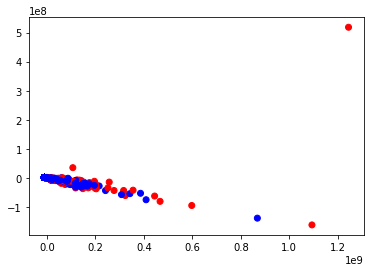

In [100]:
plt.scatter(plot_points[:,0], plot_points[:,1], c = ['r']*300 + ['b']*168)
plt.show